# Telco Classification Project

***

# Project Planning

In [ ]:
![Telecom Image](http://shutterstock.7eer.net/c/13749/42119/1305?u=http://www.shutterstock.com/pic.mhtml?id=713581222&subid1=search&subid2=top&subid3=mosaicapi&sharedid=photo-search-top)

<span style='background :skyblue' >PLAN </span>-> Acquire -> Prepare -> Explore -> Model & Evaluate -> Deliver

 Customers at the telecommunications company, Telco, are churning.  The goal of this project is to determine why customers are churning by developing machine learning classification models to predict customer churn based on the customer data available. The models will be created using Python, Pandas, Matplot, Seaborn, and Scikit-Learn libraries.

### Business Goals

- Find drivers for customer churn at Telco. 


- Construct a Machine Learning classification model that accurately predicts customer churn.

***

# Executive Summary
- My findings are:

    - I will be using the decision tree model as my best model for prediction my target value, churn because:
there is an accuracy of 79.36% on the train set and 78.95% on the validate set
this model outperformed my baseline score of 73.12%
there is not a large drop off of accuracy between the two sets (thus it is not overfit)

- Next Steps/If I had more time:
I would run more models and change the hyperparameters on several different versions
I would look into adding surveying to exiting customers to further understand their actual cause of churn
We can then target the true reason to reduce churn in future customers


# Questions to Consider Upon Getting Started:

So customers are churning and we don't know why.  

- Are there clear groupings where a customer is more likely to churn?

- What if you consider contract type?
- Is there a tenure value at which month-to-month customers are most likely to churn? 1-year contract customers? 2-year contract customers?

Thoughts on what could be going on? (Be sure to state these thoughts not as facts but as untested hypotheses until you test them!). 

You might want to plot the rate of churn on a line chart where x is the tenure and y is the rate of churn (customers churned/total customers).
Are there features that indicate a higher likelihood for customer churn?

- How influential are internet service type, phone service type, online security and backup services, senior citizen status, paying more than x% of customers with the same services, etc.?
- Is there a price threshold for specific services beyond which the likelihood of churn increases?

- If so, what is that point and for which service(s)?
- If we looked at churn rate for month-to-month customers after the 12th month and that of 1-year contract customers after the 12th month, are those rates comparable?

Clearly state your starting hypotheses (and add the testing of these to your task list).

### From the previous Telco churn project, I discovered that many month-to-month customers who churn are not on automatic payment plans.

To follow up:

- Are customers on automatic payment plans churning more than customers not on automatic payment types?
- Is there one payment type that is more likely to churn?  
- Does contract type, whether month-to-month or yearly, affect the churn by payment type?
- Who are the customers on automatic payments? Senior citizens, singles, couples, persons with dependents?
- What services do they subscribe to?
- Do they have more than one type of service?
- How much do they pay compared to those not on automatic payments? Are they charged more?
- What is the tenure at which month-to-month customers not on automatic payments churn?  How does this compare to 1-year and 2-year contract non-automatic payment customers?
- Are there more 1-year or 2-year contract non-automatic payment type customers than month-to-month customers?





### Initial Hypothesis: 

- Customers on automatic payment plans churn less than customers on non-automatic payment plans

### Alternative Hypothesis:

- Customers on automatic payment plans churn the same amount or more than customers on non-automatic payment plans


Another Possible Hypothesis to Explore: 
- Customers not on automatic payment plans have less services than customers on automatic payment plans




# Data Acquisition

Plan -><span style='background :skyblue' > ACQUIRE </span>-> Prepare -> Explore -> Model & Evaluate -> Deliver

In [1]:
#import libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# https://seaborn.pydata.org/tutorial/color_palettes.html
# https://matplotlib.org/2.0.2/examples/color/colormaps_reference.html

# set seaborn color palette
sns.color_palette("crest")
pal = sns.set_palette('crest')

# import models
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import classification_report, confusion_matrix, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import sklearn.feature_selection as feat_select
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder, normalize

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

#import custom functions
import acquire
import prepare
import explore

In [2]:
# Acquire data from SQL Telco Churn database using custom function

df = acquire.get_telco_data()

In [3]:
# Take an initial look at the data acquired
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28172 entries, 0 to 28171
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  28172 non-null  int64  
 1   customer_id                 28172 non-null  object 
 2   gender                      28172 non-null  object 
 3   senior_citizen              28172 non-null  int64  
 4   partner                     28172 non-null  object 
 5   dependents                  28172 non-null  object 
 6   tenure                      28172 non-null  int64  
 7   phone_service               28172 non-null  object 
 8   multiple_lines              28172 non-null  object 
 9   internet_service_type_id    28172 non-null  int64  
 10  online_security             28172 non-null  object 
 11  online_backup               28172 non-null  object 
 12  device_protection           28172 non-null  object 
 13  tech_support                281

In [4]:
df.shape

(28172, 28)

In [ ]:
df.describe()

In [ ]:
df.head()

In [ ]:
#Check for nulls
df.isna().sum()

In [ ]:
# Check out distributions of numeric columns.

num_cols = df.columns[[df[col].dtype == 'int64' for col in df.columns]]
for col in num_cols:
    plt.hist(df[col])
    plt.title(col)
    plt.show()

In [ ]:
# Use .describe with object columns.

obj_cols = df.columns[[df[col].dtype == 'O' for col in df.columns]]
for col in obj_cols:
    print(df[col].value_counts())
    print(df[col].value_counts(normalize=True, dropna=False))
    print('----------------------')

In [ ]:
# total churn counts
df.churn.value_counts()

In [ ]:
df.payment_type.value_counts()

In [ ]:
# Find columns with missing values and the total of missing values.

missing = df.isnull().sum()
missing[missing > 0]

***

# Data Preparation

Plan -> Acquire -><span style='background :skyblue' > PREPARE </span>-> Explore -> Model & Evaluate -> Deliver
***

### In Your prepare.py module

Store functions that are needed to prepare your data; make sure your module contains the necessary imports to run your code. Your final function should do the following:

Split your data into train/validate/test.

Handle Missing Values.

Handle erroneous data and/or outliers you wish to address.

Encode variables as needed.

Create any new features, if you decided to make any for this project.

### In Your Notebook

Explore missing values and document takeaways/action plans for handling them.

Is 'missing' equivalent to 0 (or some other constant value) in the specific case of this variable?

Should you replace the missing values with a value it is most likely to represent, like mean/median/mode?

Should you remove the variable (column) altogether because of the percentage of missing data?

Should you remove individual observations (rows) with a missing value for that variable?

Explore data types and adapt types or data values as needed to have numeric represenations of each attribute.

Create any new features you want to use in your model. Some ideas you might want to explore after securing a MVP:

Create a new feature that represents tenure in years.

Create single variables for or find other methods to merge variables representing the information from the following columns:

phone_service and multiple_lines
dependents and partner
streaming_tv & streaming_movies
online_security & online_backup
Import your prepare function from your prepare.py module and use it to prepare your data in your notebook.



In [ ]:
df.head()

In [5]:
df['total_charges'] = pd.to_numeric(df['total_charges'], errors='coerce')
print('number of nulls', df.isna().sum())

number of nulls Unnamed: 0                     0
customer_id                    0
gender                         0
senior_citizen                 0
partner                        0
dependents                     0
tenure                         0
phone_service                  0
multiple_lines                 0
internet_service_type_id       0
online_security                0
online_backup                  0
device_protection              0
tech_support                   0
streaming_tv                   0
streaming_movies               0
contract_type_id               0
paperless_billing              0
payment_type_id                0
monthly_charges                0
total_charges                 44
churn                          0
contract_type_id.1             0
contract_type                  0
internet_service_type_id.1     0
internet_service_type          0
payment_type_id.1              0
payment_type                   0
dtype: int64


In [6]:
missing = df.isnull().sum()
print('-----')
print(missing[missing > 0])

-----
total_charges    44
dtype: int64


In [7]:
# Seeing that we have 44 nulls in total charges, NEED TO DECIDE WHAT TO DO WITH THEM

In [10]:
#Create a mask to look at only customers with total charges equal to null
total_charges_null = df.total_charges.isnull()
total_charges_null

0        False
1        False
2        False
3        False
4        False
         ...  
28167    False
28168    False
28169    False
28170    False
28171    False
Name: total_charges, Length: 28172, dtype: bool

In [11]:
#Look at the data where total_charges is null to determine how to clean these null values

In [12]:
df[total_charges_null].describe()

,Unnamed: 0,senior_citizen,tenure,internet_service_type_id,contract_type_id,payment_type_id,monthly_charges,total_charges,contract_type_id.1,internet_service_type_id.1,payment_type_id.1
count,44.000000,44.0,44.0,44.000000,44.000000,44.000000,44.000000,0.0,44.000000,44.000000,44.00000
mean,10745.136364,0.0,0.0,2.090909,2.909091,2.363636,41.418182,NaN,2.909091,2.090909,2.50000
std,4757.204224,0.0,0.0,1.007372,0.290803,0.650256,22.985124,NaN,0.290803,1.007372,1.13096
min,3780.000000,0.0,0.0,1.000000,2.000000,2.000000,19.700000,NaN,2.000000,1.000000,1.00000
25%,7626.750000,0.0,0.0,1.000000,3.000000,2.000000,20.000000,NaN,3.000000,1.000000,1.75000
50%,9001.500000,0.0,0.0,3.000000,3.000000,2.000000,25.750000,NaN,3.000000,3.000000,2.50000
75%,12472.250000,0.0,0.0,3.000000,3.000000,3.000000,61.900000,NaN,3.000000,3.000000,3.25000
max,21735.000000,0.0,0.0,3.000000,3.000000,4.000000,80.850000,NaN,3.000000,3.000000,4.00000


In [13]:
df[total_charges_null].shape

(44, 28)

In [14]:
df[total_charges_null].monthly_charges

3780     56.05
3781     56.05
3782     56.05
3783     56.05
6924     20.00
6925     20.00
6926     20.00
6927     20.00
7624     61.90
7625     61.90
7626     61.90
7627     61.90
8100     19.70
8101     19.70
8102     19.70
8103     19.70
8704     20.25
8705     20.25
8706     20.25
8707     20.25
9000     25.35
9001     25.35
9002     25.35
9003     25.35
11420    73.35
11421    73.35
11422    73.35
11423    73.35
12208    25.75
12209    25.75
12210    25.75
12211    25.75
12472    52.55
12473    52.55
12474    52.55
12475    52.55
16216    80.85
16217    80.85
16218    80.85
16219    80.85
21732    19.85
21733    19.85
21734    19.85
21735    19.85
Name: monthly_charges, dtype: float64

In [15]:
#While total_charges is null, monthly_charges have values.  Let's look at how long of a tenure these customers have.

In [16]:
df[total_charges_null].tenure.mean()

0.0

In [17]:
#All are new customers and don't have even one month with the company.

In [20]:
#Create a mask to look at customers with one month of tenure to look at their monthly and total charges
tenure_one = df['tenure'] == 1
tenure_one

0        False
1        False
2        False
3        False
4        False
         ...  
28167    False
28168    False
28169    False
28170    False
28171    False
Name: tenure, Length: 28172, dtype: bool

In [22]:
df[tenure_one].total_charges

68       72.10
69       72.10
70       72.10
71       72.10
76       25.10
         ...  
28135    18.90
28144    70.15
28145    70.15
28146    70.15
28147    70.15
Name: total_charges, Length: 2452, dtype: float64

In [23]:
df[tenure_one].monthly_charges

68       72.10
69       72.10
70       72.10
71       72.10
76       25.10
         ...  
28135    18.90
28144    70.15
28145    70.15
28146    70.15
28147    70.15
Name: monthly_charges, Length: 2452, dtype: float64

In [ ]:
#Since customers with one month of tenure have total charges equal to their monthly charges, this implies that 
#customers with 0 tenure just haven't been charged yet because they are new customers.  
#Thus, I am going to set the total charge value for customers with null values to 0. 


### Prepare Data

In [24]:
# Prepare Telco data by removing ID number columns, removing any duplicates, encoding and creating dummies
df = prepare.prep_telco(df)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56168 entries, 0 to 28171
Data columns (total 42 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   gender                                  56168 non-null  int64  
 1   senior_citizen                          56168 non-null  int64  
 2   partner                                 56168 non-null  int64  
 3   dependents                              56168 non-null  int64  
 4   tenure                                  56168 non-null  int64  
 5   phone_service                           56168 non-null  int64  
 6   paperless_billing                       56168 non-null  int64  
 7   monthly_charges                         56168 non-null  float64
 8   total_charges                           56168 non-null  float64
 9   churn                                   56168 non-null  int64  
 10  multiple_lines_No                       56168 non-null  fl

In [26]:
df.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,paperless_billing,monthly_charges,total_charges,churn,...,contract_type_One year,contract_type_Two year,internet_service_type_DSL,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Bank transfer (automatic),payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check,automatic_pmt
0,0,0,1,1,9,1,1,65.6,593.3,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0,0,1,1,9,1,1,65.6,593.3,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0,0,1,1,9,1,1,65.6,593.3,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0,0,1,1,9,1,1,65.6,593.3,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,1,0,0,0,9,1,0,59.9,542.4,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [27]:
df.shape

(56168, 42)

In [28]:
df.describe()

,gender,senior_citizen,partner,dependents,tenure,phone_service,paperless_billing,monthly_charges,total_charges,churn,...,contract_type_One year,contract_type_Two year,internet_service_type_DSL,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Bank transfer (automatic),payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check,automatic_pmt
count,56168.000000,56168.000000,56168.000000,56168.000000,56168.000000,56168.000000,56168.000000,56168.000000,56168.000000,56168.000000,...,56168.000000,56168.000000,56168.000000,56168.000000,56168.000000,56168.000000,56168.000000,56168.000000,56168.000000,56168.000000
mean,0.504344,0.162512,0.484546,0.300527,32.469449,0.902863,0.592651,64.851894,2286.765026,0.264492,...,0.104900,0.120709,0.172269,0.220054,0.107677,0.125000,0.125000,0.125000,0.125000,0.750000
std,0.499986,0.368924,0.499766,0.458491,24.533436,0.296147,0.491345,30.067127,2266.713795,0.441066,...,0.306427,0.325792,0.377617,0.414287,0.309975,0.330722,0.330722,0.330722,0.330722,0.433017
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.750000,403.350000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.750000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.400000,1400.550000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.900000,3801.700000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [29]:
# Split the data to ready for exploration, modeling, and testing
# Using the prepare custom library, take in a DataFrame and return train, validate, and test DataFrames; 
# Stratify on churn

train, validate, test = prepare.split_data(df)

In [53]:
print(f'train shape: {train.shape}')
print(f'validate shape: {validate.shape}')
print(f'test shape: {test.shape}')

train shape: (31453, 42)
validate shape: (13481, 42)
test shape: (11234, 42)


In [30]:
train.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,paperless_billing,monthly_charges,total_charges,churn,...,contract_type_One year,contract_type_Two year,internet_service_type_DSL,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Bank transfer (automatic),payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check,automatic_pmt
2352,1,0,0,0,5,1,0,75.15,392.65,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
27916,0,1,0,0,65,0,1,53.50,3517.90,0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1
25590,0,0,0,0,51,0,1,56.40,2928.50,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
22973,0,0,0,0,30,1,1,79.30,2427.10,0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1
12731,0,0,0,0,47,1,1,58.90,2813.05,0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1


In [31]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31453 entries, 2352 to 27190
Data columns (total 42 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   gender                                  31453 non-null  int64  
 1   senior_citizen                          31453 non-null  int64  
 2   partner                                 31453 non-null  int64  
 3   dependents                              31453 non-null  int64  
 4   tenure                                  31453 non-null  int64  
 5   phone_service                           31453 non-null  int64  
 6   paperless_billing                       31453 non-null  int64  
 7   monthly_charges                         31453 non-null  float64
 8   total_charges                           31453 non-null  float64
 9   churn                                   31453 non-null  int64  
 10  multiple_lines_No                       31453 non-null 

### Takeaways

- Removed duplicate index column created when acquired
- Removed customer_id since it is not helpful
- Removed duplicate ID columns created when tables were joined

- Encoded all columns containing strings for: 'partner','dependents','phone_service','multiple_lines','paperless_billing','churn','gender'

- Created dummy variables for: 'multiple_lines','online_security','online_backup','device_protection','tech_support','streaming_tv','streaming_movies',
'contract_type','internet_service_type','payment_type'

- Converted total_charges column to a float type and filled in all null values with a 0 after determining
    that they are new customers with a tenure of 0 who haven't been charged yet.

- Feature engineering: 
    - Created new columns to filter by automatic payment and month-to-month churned customers
        - 'automatic_pmt' for 'payment_type_Bank transfer (automatic)' and'payment_type_Credit card (automatic)' types 

***

# Data Exploration & Analysis

Plan -> Acquire -> Prepare -> <span style='background :skyblue' >EXPLORE </span>-> Model & Evaluate -> Deliver

In Your Notebook

Answer key questions, your initial hypotheses from , and figure out the drivers of churn. You are required to run at least 2 statistical tests in your data exploration. Make sure you document your hypotheses, set your alpha before running the tests, and document your findings well.

Create visualizations and run statistical tests that work toward discovering variable relationships (independent with independent and independent with dependent). The goal is to identify features that are related to churn (your target), identify any data integrity issues, and understand 'how the data works'. If there appears to be some sort of interaction or correlation, assume there is no causal relationship and brainstorm (and document) ideas on reasons there could be correlation.

For example: We may find that all who have online services also have device protection. In that case, we don't need both of those.

Summarize your conclusions, provide clear answers to your specific questions, and summarize any takeaways/action plan from the work above.
Below are some questions you might decide to explore in this stage:

If a group is identified by tenure, is there a cohort or cohorts who have a higher rate of churn than other cohorts?

For Example: You might plot the rate of churn on a line chart where x is the tenure and y is the rate of churn (customers churned/total customers)

Are there features that indicate a higher propensity to churn?

For Example: type of internet service, type of phone service, online security and backup, senior citizens, paying more than x% of customers with the same services, etc.

Is there a price threshold for specific services where the likelihood of churn increases once price for those services goes past that point? If so, what is that point for what service(s)?

If we looked at churn rate for month-to-month customers after the 12th month and that of 1-year contract customers after the 12th month, are those rates comparable?

Controlling for services (phone_id, internet_service_type_id, online_security_backup, device_protection, tech_support, and contract_type_id), is the mean monthly_charges of those who have churned significantly different from that of those who have not churned? (Use a t-test to answer this.)

How much of monthly_charges can be explained by internet_service_type?

Hint: Run a correlation test. State your hypotheses and document your findings clearly.

How much of monthly_charges can be explained by internet_service_type + phone_service_type (0, 1, or multiple lines).

Questions:  
    
    - Are customers on automatic payment plans less likely to churn than customers not on automatic payments?
    
    - What services do non-automatic payment plan customers subscribe to? What type of service?
    
    - Do they have more than one service?
     
    - Do they pay more than those on automatic payment plans?
    
    - What is the tenure of non-automatic vs automatic payment plans?
    
    - Is there price where we see non-automatic payment plan customer churn?  What is that price, if so?
    
    
Null Hypothesis:


- Customers on automatic payment plans churn less than customers on non-automatic payment plans

Alternative Hypothesis:

- Customers on automatic payment plans churn the same amount or more than customers on non-automatic payment plans

### Explore 

#### Univariate Stats: 

##### Descriptive stats, frequencies, histograms. General familiar with data.

- Explore the target variable.

- Explore the categorical/qualitative variables.

- Explore the continuous/quantitative variables.

In [60]:
#First, we need list of categorical variables and one of quantitative variables.

cat_vars = ['gender', 'senior_citizen', 'partner', 'dependents', 'phone_service', 'paperless_billing', 'churn','multiple_lines_Yes',
            'online_security_Yes','online_backup_Yes', 'tech_support_Yes',
           'streaming_tv_Yes','streaming_movies_Yes',
           'contract_type_Month-to-month', 'contract_type_One year',
           'contract_type_Two year', 'internet_service_type_DSL',
           'internet_service_type_Fiber optic', 'internet_service_type_None',
           'payment_type_Bank transfer (automatic)',
           'payment_type_Credit card (automatic)', 'payment_type_Electronic check',
           'payment_type_Mailed check', 'automatic_pmt']

cat_vars_select = ['gender', 'senior_citizen', 'partner', 'dependents', 'phone_service', 'paperless_billing', 'churn',
           'payment_type_Bank transfer (automatic)',
           'payment_type_Credit card (automatic)', 'payment_type_Electronic check',
           'payment_type_Mailed check', 'automatic_pmt']

quant_vars = ['tenure', 'monthly_charges','total_charges']


In [61]:
df.automatic_pmt.value_counts()

1    42126
0    14042
Name: automatic_pmt, dtype: int64

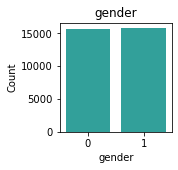

   gender  Count  Percent
1       1  15795    50.22
0       0  15658    49.78
_________________________________________________________________


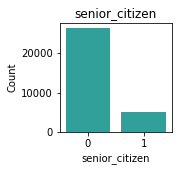

   senior_citizen  Count  Percent
0               0  26319    83.68
1               1   5134    16.32
_________________________________________________________________


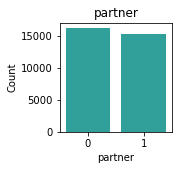

   partner  Count  Percent
0        0  16138    51.31
1        1  15315    48.69
_________________________________________________________________


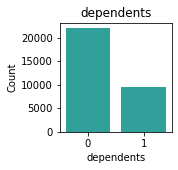

   dependents  Count  Percent
0           0  21986     69.9
1           1   9467     30.1
_________________________________________________________________


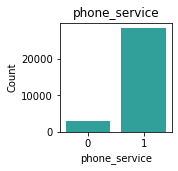

   phone_service  Count  Percent
1              1  28442    90.43
0              0   3011     9.57
_________________________________________________________________


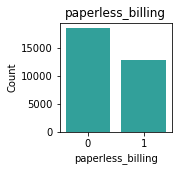

   paperless_billing  Count  Percent
1                  0  18545    58.96
0                  1  12908    41.04
_________________________________________________________________


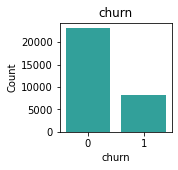

   churn  Count  Percent
0      0  23134    73.55
1      1   8319    26.45
_________________________________________________________________


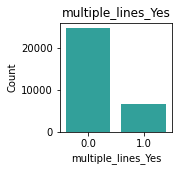

     multiple_lines_Yes  Count  Percent
0.0                 0.0  24729    78.62
1.0                 1.0   6724    21.38
_________________________________________________________________


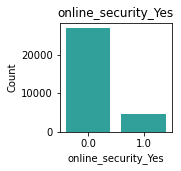

     online_security_Yes  Count  Percent
0.0                  0.0  26872    85.44
1.0                  1.0   4581    14.56
_________________________________________________________________


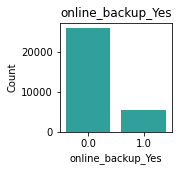

     online_backup_Yes  Count  Percent
0.0                0.0  25926    82.43
1.0                1.0   5527    17.57
_________________________________________________________________


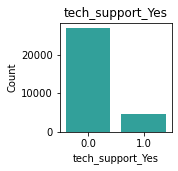

     tech_support_Yes  Count  Percent
0.0               0.0  26844    85.35
1.0               1.0   4609    14.65
_________________________________________________________________


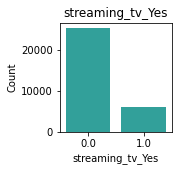

     streaming_tv_Yes  Count  Percent
0.0               0.0  25371    80.66
1.0               1.0   6082    19.34
_________________________________________________________________


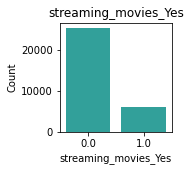

     streaming_movies_Yes  Count  Percent
0.0                   0.0  25289     80.4
1.0                   1.0   6164     19.6
_________________________________________________________________


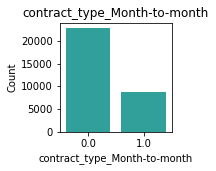

     contract_type_Month-to-month  Count  Percent
0.0                           0.0  22783    72.44
1.0                           1.0   8670    27.56
_________________________________________________________________


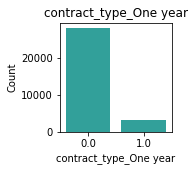

     contract_type_One year  Count  Percent
0.0                     0.0  28123    89.41
1.0                     1.0   3330    10.59
_________________________________________________________________


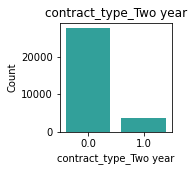

     contract_type_Two year  Count  Percent
0.0                     0.0  27659    87.94
1.0                     1.0   3794    12.06
_________________________________________________________________


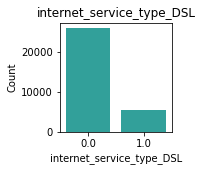

     internet_service_type_DSL  Count  Percent
0.0                        0.0  25985    82.62
1.0                        1.0   5468    17.38
_________________________________________________________________


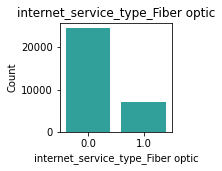

     internet_service_type_Fiber optic  Count  Percent
0.0                                0.0  24475    77.81
1.0                                1.0   6978    22.19
_________________________________________________________________


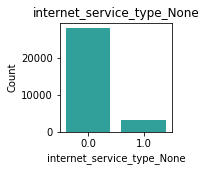

     internet_service_type_None  Count  Percent
0.0                         0.0  28105    89.36
1.0                         1.0   3348    10.64
_________________________________________________________________


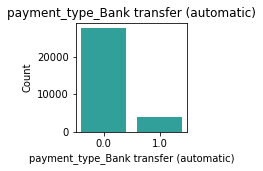

     payment_type_Bank transfer (automatic)  Count  Percent
0.0                                     0.0  27508    87.46
1.0                                     1.0   3945    12.54
_________________________________________________________________


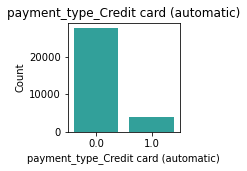

     payment_type_Credit card (automatic)  Count  Percent
0.0                                   0.0  27546    87.58
1.0                                   1.0   3907    12.42
_________________________________________________________________


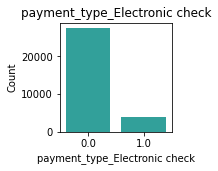

     payment_type_Electronic check  Count  Percent
0.0                            0.0  27463    87.31
1.0                            1.0   3990    12.69
_________________________________________________________________


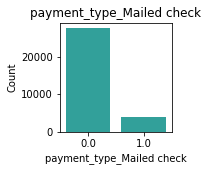

     payment_type_Mailed check  Count  Percent
0.0                        0.0  27501    87.44
1.0                        1.0   3952    12.56
_________________________________________________________________


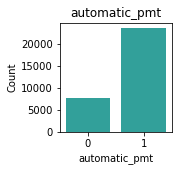

   automatic_pmt  Count  Percent
1              1  23615    75.08
0              0   7838    24.92
_________________________________________________________________


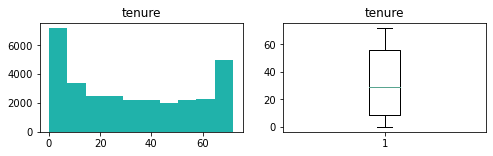

count    31453.000000
mean        32.456777
std         24.594817
min          0.000000
25%          9.000000
50%         29.000000
75%         56.000000
max         72.000000
Name: tenure, dtype: float64


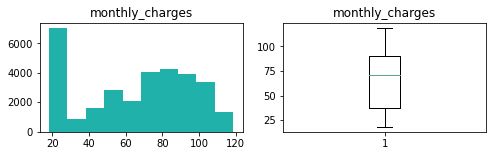

count    31453.000000
mean        65.037205
std         29.965072
min         18.250000
25%         37.700000
50%         70.550000
75%         89.950000
max        118.750000
Name: monthly_charges, dtype: float64


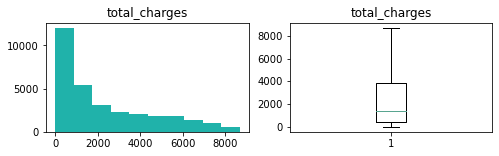

count    31453.000000
mean      2294.658589
std       2271.321057
min          0.000000
25%        398.550000
50%       1415.550000
75%       3842.600000
max       8684.800000
Name: total_charges, dtype: float64


In [62]:
explore.explore_univariate(train, cat_vars, quant_vars)

#### Takeaways

- Majority of customers are not senior citizens: About 84% are not senior citizens while 16% are senior citizens
- About equal amount of customers have a partner: 51% do not have a partner while 49% do have a partner
- Majority of customers do not have dependents: 70% do not have dependents while 30% do
- Majority of customers do subscribe to phone service: 90% do have phone service while 10% do not
- About equal amount of customer use paperless billing: 59% do not have paperless billing while 41% do
- Majority of customers are not churning: 74% did not churn while 26% did churn
- Majority of customers do not have multiple lines: 76% do not have multiple lines while 24% do
- Majority of customers do not have online security: 85% do not have online security while 15% do
- Majority of customers do not have streaming TV: 81% do not have streaming TV while 19% do
- Majority of customers do not have tech support: 85% do not while 15% do
- Majority of are not month-to-month customers: 72% are not while 28% are
- Average tenure is 32 months
- Average monthly charge is 65 with a min of 18 and a max of 119
- Average total charges are 2295 with a min of 0 and a max of 8684
- Majority of customers are on automatic payment plan: 75% are on automatic while 25% are not on automatic payment plan



In [63]:
  '''
    takes in a dataframe and a quantitative variable and returns
    descriptive stats table, histogram, and boxplot of the distributions. 
    '''
descriptive_stats = train[quant_vars].describe()
descriptive_stats

,tenure,monthly_charges,total_charges
count,31453.000000,31453.000000,31453.000000
mean,32.456777,65.037205,2294.658589
std,24.594817,29.965072,2271.321057
min,0.000000,18.250000,0.000000
25%,9.000000,37.700000,398.550000
50%,29.000000,70.550000,1415.550000
75%,56.000000,89.950000,3842.600000
max,72.000000,118.750000,8684.800000


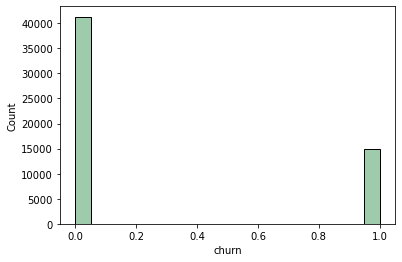

In [65]:
sns.histplot(df.churn)
plt.show()

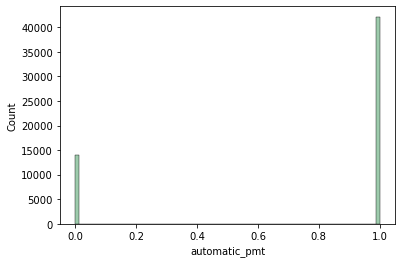

In [39]:
sns.histplot(df.automatic_pmt)
plt.show()

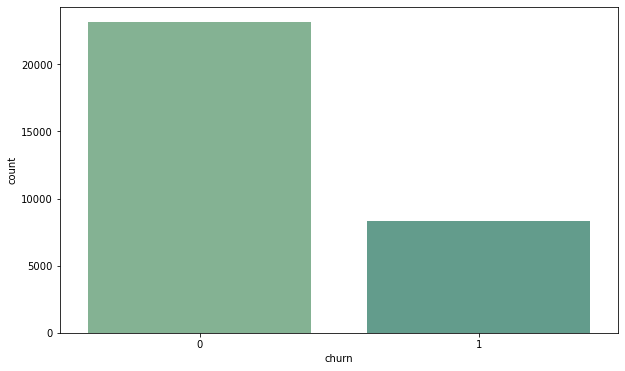

In [40]:
#visualize churn data using a countplot
plt.figure(figsize=(10,6))
sns.countplot(x='churn', data=train)
plt.show()

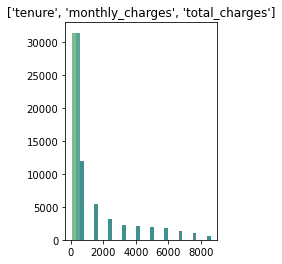

In [42]:
    p = plt.subplot(1, 2, 1)
    p = plt.hist(train[quant_vars])
    p = plt.title(quant_vars)

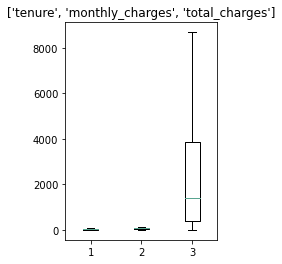

In [43]:
    # second plot: box plot
    p = plt.subplot(1, 2, 2)
    p = plt.boxplot(train[quant_vars])
    p = plt.title(quant_vars)

### Bivariate Stats

We will use our explore_bivariate(train, target, cat_vars, quant_vars) function that takes in a dataframe, the name of the binary target variable, a list of the names of the categorical variables, a list of the names of the quantitative variables. Each feature is analyzed with respect to the binary target variable. 
For each categorical variable, a crosstab of frequencies is returned along with the results from a chi-square test that is run, and a barplot. For each quantitative variable, descriptive statistics are computed with respect to the target variable. Difference in means of the quant variable are tested between each class in the target using Mann-Whitney. Finally, a boxenplot and a swarmplot of the target with the quantitative variable are returned.

We will want to remove the target variable from that list, as the function takes that variable as a separate argument.

In [73]:
cat_vars_w_o_target = ['gender', 'senior_citizen', 'partner', 'dependents', 'phone_service', 'paperless_billing','multiple_lines_Yes',
            'online_security_Yes','online_backup_Yes', 'tech_support_Yes',
           'streaming_tv_Yes','streaming_movies_Yes',
           'contract_type_Month-to-month', 'contract_type_One year',
           'contract_type_Two year', 'internet_service_type_DSL',
           'internet_service_type_Fiber optic', 'internet_service_type_None',
           'payment_type_Bank transfer (automatic)',
           'payment_type_Credit card (automatic)', 'payment_type_Electronic check',
           'payment_type_Mailed check', 'automatic_pmt']

gender 
_____________________

       chi2  p-value  degrees of freedom
0  3.123095  0.07719                   1

observed:
 churn       0     1    All
gender                    
0       11447  4211  15658
1       11687  4108  15795
All     23134  8319  31453

expected:
               0            1
0  11516.617556  4141.382444
1  11617.382444  4177.617556


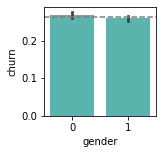


_____________________

senior_citizen 
_____________________

         chi2        p-value  degrees of freedom
0  675.963196  5.044236e-149                   1

observed:
 churn               0     1    All
senior_citizen                    
0               20110  6209  26319
1                3024  2110   5134
All             23134  8319  31453

expected:
               0            1
0  19357.891012  6961.108988
1   3776.108988  1357.891012


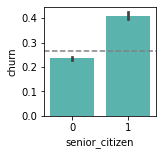


_____________________

partner 
_____________________

         chi2        p-value  degrees of freedom
0  688.858254  7.917312e-152                   1

observed:
 churn        0     1    All
partner                    
0        10843  5295  16138
1        12291  3024  15315
All      23134  8319  31453

expected:
               0            1
0  11869.662417  4268.337583
1  11264.337583  4050.662417


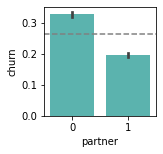


_____________________

dependents 
_____________________

         chi2        p-value  degrees of freedom
0  824.781816  2.208766e-181                   1

observed:
 churn           0     1    All
dependents                    
0           15140  6846  21986
1            7994  1473   9467
All         23134  8319  31453

expected:
               0            1
0  16170.925635  5815.074365
1   6963.074365  2503.925635


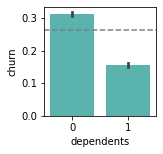


_____________________

phone_service 
_____________________

       chi2   p-value  degrees of freedom
0  2.567746  0.109063                   1

observed:
 churn              0     1    All
phone_service                    
0               2252   759   3011
1              20882  7560  28442
All            23134  8319  31453

expected:
              0           1
0   2214.62099   796.37901
1  20919.37901  7522.62099


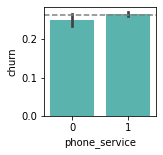


_____________________

paperless_billing 
_____________________

          chi2        p-value  degrees of freedom
0  1098.913561  5.688742e-241                   1

observed:
 churn                  0     1    All
paperless_billing                    
0                  10770  2138  12908
1                  12364  6181  18545
All                23134  8319  31453

expected:
               0            1
0   9493.964709  3414.035291
1  13640.035291  4904.964709


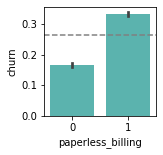


_____________________

multiple_lines_Yes 
_____________________

        chi2   p-value  degrees of freedom
0  22.782993  0.000002                   1

observed:
 churn                   0     1    All
multiple_lines_Yes                    
0.0                 18342  6387  24729
1.0                  4792  1932   6724
All                 23134  8319  31453

expected:
               0            1
0  18188.429911  6540.570089
1   4945.570089  1778.429911


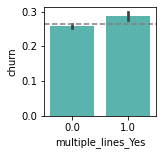


_____________________

online_security_Yes 
_____________________

         chi2       p-value  degrees of freedom
0  377.521115  4.311795e-84                   1

observed:
 churn                    0     1    All
online_security_Yes                    
0.0                  19228  7644  26872
1.0                   3906   675   4581
All                  23134  8319  31453

expected:
               0            1
0  19764.628112  7107.371888
1   3369.371888  1211.628112


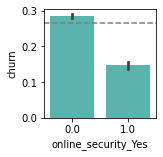


_____________________

online_backup_Yes 
_____________________

        chi2       p-value  degrees of freedom
0  95.769297  1.290821e-22                   1

observed:
 churn                  0     1    All
online_backup_Yes                    
0.0                18777  7149  25926
1.0                 4357  1170   5527
All                23134  8319  31453

expected:
               0            1
0  19068.835532  6857.164468
1   4065.164468  1461.835532


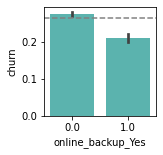


_____________________

tech_support_Yes 
_____________________

         chi2       p-value  degrees of freedom
0  380.406379  1.015048e-84                   1

observed:
 churn                 0     1    All
tech_support_Yes                    
0.0               19204  7640  26844
1.0                3930   679   4609
All               23134  8319  31453

expected:
               0            1
0  19744.033828  7099.966172
1   3389.966172  1219.033828


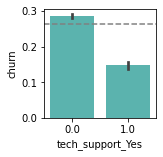


_____________________

streaming_tv_Yes 
_____________________

        chi2       p-value  degrees of freedom
0  52.514859  4.270053e-13                   1

observed:
 churn                 0     1    All
streaming_tv_Yes                    
0.0               18885  6486  25371
1.0                4249  1833   6082
All               23134  8319  31453

expected:
               0            1
0  18660.627412  6710.372588
1   4473.372588  1608.627412


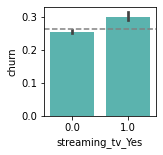


_____________________

streaming_movies_Yes 
_____________________

       chi2       p-value  degrees of freedom
0  44.09423  3.129420e-11                   1

observed:
 churn                     0     1    All
streaming_movies_Yes                    
0.0                   18807  6482  25289
1.0                    4327  1837   6164
All                   23134  8319  31453

expected:
               0            1
0  18600.315582  6688.684418
1   4533.684418  1630.315582


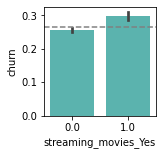


_____________________

contract_type_Month-to-month 
_____________________

          chi2  p-value  degrees of freedom
0  1584.606293      0.0                   1

observed:
 churn                             0     1    All
contract_type_Month-to-month                    
0.0                           18149  4634  22783
1.0                            4985  3685   8670
All                           23134  8319  31453

expected:
               0            1
0  16757.127206  6025.872794
1   6376.872794  2293.127206


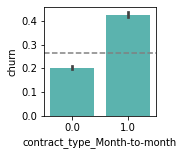


_____________________

contract_type_One year 
_____________________

         chi2       p-value  degrees of freedom
0  414.950183  3.066297e-92                   1

observed:
 churn                       0     1    All
contract_type_One year                    
0.0                     20194  7929  28123
1.0                      2940   390   3330
All                     23134  8319  31453

expected:
              0           1
0  20684.75128  7438.24872
1   2449.24872   880.75128


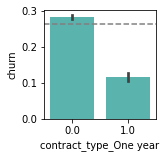


_____________________

contract_type_Two year 
_____________________

          chi2        p-value  degrees of freedom
0  1250.707187  5.826406e-274                   1

observed:
 churn                       0     1    All
contract_type_Two year                    
0.0                     19442  8217  27659
1.0                      3692   102   3794
All                     23134  8319  31453

expected:
               0            1
0  20343.474581  7315.525419
1   2790.525419  1003.474581


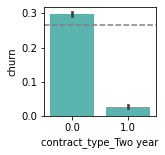


_____________________

internet_service_type_DSL 
_____________________

        chi2       p-value  degrees of freedom
0  198.56641  4.292189e-45                   1

observed:
 churn                          0     1    All
internet_service_type_DSL                    
0.0                        18694  7291  25985
1.0                         4440  1028   5468
All                        23134  8319  31453

expected:
              0           1
0  19112.23063  6872.76937
1   4021.76937  1446.23063


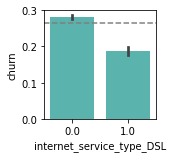


_____________________

internet_service_type_Fiber optic 
_____________________

          chi2        p-value  degrees of freedom
0  1045.502179  2.311797e-229                   1

observed:
 churn                                  0     1    All
internet_service_type_Fiber optic                    
0.0                                19053  5422  24475
1.0                                 4081  2897   6978
All                                23134  8319  31453

expected:
               0            1
0  18001.610339  6473.389661
1   5132.389661  1845.610339


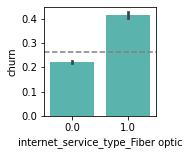


_____________________

internet_service_type_None 
_____________________

         chi2        p-value  degrees of freedom
0  688.524423  9.357786e-152                   1

observed:
 churn                           0     1    All
internet_service_type_None                    
0.0                         20038  8067  28105
1.0                          3096   252   3348
All                         23134  8319  31453

expected:
               0            1
0  20671.512097  7433.487903
1   2462.487903   885.512097


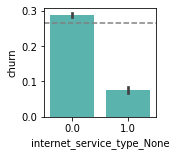


_____________________

payment_type_Bank transfer (automatic) 
_____________________

       chi2   p-value  degrees of freedom
0  0.052084  0.819475                   1

observed:
 churn                                       0     1    All
payment_type_Bank transfer (automatic)                    
0.0                                     20226  7282  27508
1.0                                      2908  1037   3945
All                                     23134  8319  31453

expected:
               0            1
0  20232.412552  7275.587448
1   2901.587448  1043.412552


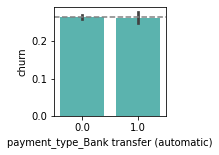


_____________________

payment_type_Credit card (automatic) 
_____________________

      chi2   p-value  degrees of freedom
0  0.39126  0.531638                   1

observed:
 churn                                     0     1    All
payment_type_Credit card (automatic)                    
0.0                                   20277  7269  27546
1.0                                    2857  1050   3907
All                                   23134  8319  31453

expected:
               0            1
0  20260.361937  7285.638063
1   2873.638063  1033.361937


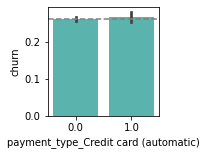


_____________________

payment_type_Electronic check 
_____________________

     chi2   p-value  degrees of freedom
0  1.3116  0.252105                   1

observed:
 churn                              0     1    All
payment_type_Electronic check                    
0.0                            20169  7294  27463
1.0                             2965  1025   3990
All                            23134  8319  31453

expected:
               0            1
0  20199.314596  7263.685404
1   2934.685404  1055.314596


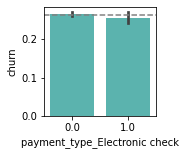


_____________________

payment_type_Mailed check 
_____________________

       chi2   p-value  degrees of freedom
0  0.550465  0.458128                   1

observed:
 churn                          0     1    All
payment_type_Mailed check                    
0.0                        20247  7254  27501
1.0                         2887  1065   3952
All                        23134  8319  31453

expected:
               0            1
0  20227.263981  7273.736019
1   2906.736019  1045.263981


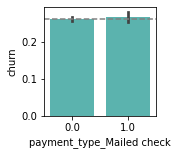


_____________________

automatic_pmt 
_____________________

       chi2   p-value  degrees of freedom
0  0.077651  0.780507                   1

observed:
 churn              0     1    All
automatic_pmt                    
0               5755  2083   7838
1              17379  6236  23615
All            23134  8319  31453

expected:
               0            1
0   5764.928369  2073.071631
1  17369.071631  6245.928369


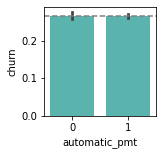


_____________________

tenure 
____________________



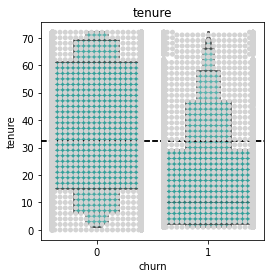

         count       mean        std  min   25%   50%   75%   max
churn                                                            
0      23134.0  37.602058  24.167486  0.0  15.0  38.0  61.0  72.0
1       8319.0  18.148455  19.609869  1.0   2.0  10.0  29.0  72.0 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=141995680.0, pvalue=0.0)

____________________

monthly_charges 
____________________



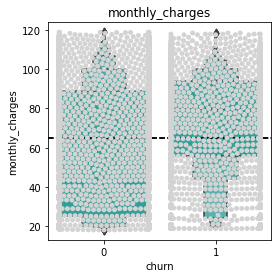

         count       mean        std    min    25%    50%   75%     max
churn                                                                  
0      23134.0  61.658537  30.982833  18.25  25.25  64.90  88.8  118.75
1       8319.0  74.432816  24.606208  18.85  55.95  79.65  94.1  118.35 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=73675162.5, pvalue=3.107326808195925e-221)

____________________

total_charges 
____________________



In [ ]:
explore.explore_bivariate(train, 'churn', cat_vars_w_o_target, quant_vars)

#### Takeaways

### Multivariate Stats & Analysis

Looking at a categorical target variable, color will represent the target, and then plot two features, x and y.

Use our function, explore_multivariate(train, target, cat_vars, quant_vars) to generate the following: 
- 2 grid plots (swarmplot and violinplot) of categorical variables x quantitative variables
- a Pairplot plotting each unique pair of quantitative variables
- a single swarmplot visualizing the values of each quantitative variable

For all of these, color represents the target variable.

In [ ]:
target = 'churn'

explore.explore_multivariate(train, target, cat_vars, quant_vars)

#### Takeaways


<AxesSubplot:xlabel='tenure', ylabel='Density'>

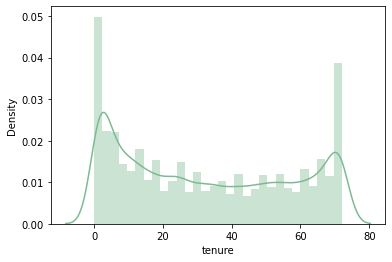

In [51]:
import seaborn as sns

sns.distplot(df.tenure)

# Modeling and Evaluation

Plan -> Acquire -> Prepare -> Explore -> <span style='background :skyblue' > MODEL & EVALUATE </span>-> Deliver

In Your Notebook

You are required to establish a baseline accuracy to determine if having a model is better than no model and train and compare at least 3 different models. Document these steps well.

Train (fit, transform, evaluate) multiple models, varying the algorithm and/or hyperparameters you use.

Compare evaluation metrics across all the models you train and select the ones you want to evaluate using your validate dataframe.

Feature Selection (optional): Are there any variables that seem to provide limited to no additional information? If so, remove them.

Based on the evaluation of your models using the train and validate datasets, choose your best model that you will try with your test data, once.

Test the final model on your out-of-sample data (the testing dataset), summarize the performance, interpret and document your results.



### Setup the baseline

In [68]:
#The most frequenly observed outcome will be our baseline
train.churn.value_counts()

0    23134
1     8319
Name: churn, dtype: int64

In [69]:
#Create the  baseline
#Because the majority did not churn, we will use 0 as our baseline
train['baseline_pred'] = 0

In [70]:
#Establish baseline accuracy
baseline_accuracy = (train.churn == train.baseline_pred).mean()
print(f'The baseline accuracy is: {baseline_accuracy:.2%}')

The baseline accuracy is: 73.55%


### Split the data along the target variable to prepare for use in models

In [ ]:
# create X & y version of train, where y is a series with just the target variable and X are all the features. 

X_train = train.drop(columns=['churn'])
y_train = train.species

X_validate = validate.drop(columns=['churn'])
y_validate = validate.species

X_test = test.drop(columns=['churn'])
y_test = test.species

### Decision Tree Model

In [ ]:
# Create the Decision Tree object with desired hyper-parameters.
clf = DecisionTreeClassifier(max_depth=3, random_state=123)

In [ ]:
#Fit the random forest model to the training data.
clf = clf.fit(X_train, y_train)

In [ ]:
#Use the model to get accuracy on training dataset
print('Accuracy of Decision Tree model on training set: {:.2f}'
      .format(clf.score(X_train, y_train)))

In [ ]:
#Use the model to get accuracy on validate dataset
print('Accuracy of Decision Tree model on validate set: {:.2f}'
     .format(clf.score(X_validate, y_validate)))

In [ ]:
print(f'training score: {dt_model.score(X_train, y_train):.2%}')
print(f'validate score: {dt_model.score(X_validate, y_validate):.2%}')

In [ ]:
# Produce y_predictions that come from the X_validate
y_pred = clf.predict(X_validate)

# Compare actual y values (from validate) to predicted y_values from the model run on X_validate
print(classification_report(y_validate, y_pred))

In [ ]:
#Visualize the Decision Tree with the use of Graphviz

By visualizing the tree, we can see the importance of features, as teh most important features will be the first splits.
import graphviz
from graphviz import Graph

dot_data = export_graphviz(clf, feature_names= X_train.columns, class_names=clf.classes_, rounded=True, filled=True, out_file=None)
graph = graphviz.Source(dot_data) 

graph.render('telco_decision_tree', view=True)

### Decision Tree Model Takeaways:
- Decision Tree Model has an accuracy of % using the train set using max_depth=
- Decision Tree Model has an accuracy of % using the validate set using max_depth=
- Both are higher than the baseline accuracy of %

### Random Forest Model
   

In [ ]:
#Create the Random Forest object with desired hyper-parameters.
rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=3,
                            n_estimators=100,
                            max_depth=3, 
                            random_state=123)

In [ ]:
# Fit the random forest model to the training data.
rf.fit(X_train, y_train)

In [ ]:
#Evaluate importance, or weight, of each feature.
print(rf.feature_importances_)

In [ ]:
#Make Predictions
y_pred = rf.predict(X_train)

In [ ]:
#Use the model to get accuracy on training dataset
print('Accuracy of random forest model on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))

In [ ]:
#Use the model to get accuracy on the validate dataset.
print('Accuracy of random forest model on validate set: {:.2f}'
     .format(rf.score(X_validate, y_validate)))

### Random Forest Model Takeaways:
- Random Forest Model has an accuracy of % using the train set
- Random Forest Model has an accuracy of % using the validate set
- Both are higher than the baseline accuracy of %

- Overfit?

### K - Nearest Neighbors Model

In [ ]:
#Create KNN Model
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')

In [ ]:
#Fit the model to the training data.
knn.fit(X_train, y_train)

In [ ]:
#Use the model to get accuracy on training dataset
print('Accuracy of KNN model on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))

In [ ]:
#Use the model to get accuracy on validate dataset
print('Accuracy of KNN model on test set: {:.2f}'
     .format(knn.score(X_validate, y_validate)))

In [ ]:
#Make Predictions
y_pred = knn.predict(X_train)

### K-Nearest Neighbors Model Takeaways:
- K-Nearest Neighbors Model has an accuracy of % using the train set
- K-Nearest Neighbors Model has an accuracy of % using the validate set
- Both are higher than the baseline accuracy of %

- Overfit?

### Logistic Regression Model

In [ ]:
# Create the logistic regression model
logit = LogisticRegression(C=1, random_state=123)


In [ ]:
#Fit the logistic regression model to the training data.
logit.fit(X_train, y_train)

In [ ]:
#Use the model to get accuracy on training dataset
print(print('Accuracy of logistic regression model on training set: {:.2f}'
     .format(logit.score(X_train, y_train)))

In [ ]:
#Use the model to get accuracy on validate dataset
print('Accuracy: {:.2f}'.format(logit.score(X_validate, y_validate)))

In [ ]:
#Evaluate importance, or weight, of each feature, using the coefficients.

#Evaluate the intercept of the model.

print('Coefficient: \n', logit.coef_)
print('Intercept: \n', logit.intercept_)

In [ ]:
# Make Predictions
y_pred = logit.predict(X_train)

In [ ]:
#Classification report of model
print(classification_report(y_validate, y_pred1))

### Logistic Regression Model Takeaways:
- Logistic Regression Model has an accuracy of % using the train set
- Logistic Regression Model has an accuracy of % using the validate set
- Both are higher than the baseline accuracy of %

- Overfit?

# Delivery

Plan -> Acquire -> Prepare -> Explore -> Model & Evaluate -> <span style='background :skyblue' > DELIVER </span>

Introduce yourself and your project goals at the very beginning of your notebook walkthrough.

Summarize your findings at the beginning like you would for an Executive Summary. Just because you don't have a slide deck for this presentation, doesn't mean you throw out everything you learned from Storytelling.

Walk us through the analysis you did to answer our questions and that lead to your findings. Relationships should be visualized and takeaways documented. Please clearly call out the questions and answers you are analyzing as well as offer insights and recommendations based on your findings.

For example: If you find that month-to-month customers churn more, we won't be surprised, but Telco is not getting rid of that plan. The fact that customers churn is not because they can; it's because they can and they are motivated to do so. We want your insights into why they are motivated to do so. We realize you will not be able to do a full causal experiment, but we would like to see some solid evidence of your conclusions.

Finish with key takeaways, recommendations, and next steps and be prepared to answer questions from the data science team about your project.

Remember you have a time limit of 5 minutes for your presentation. Make sure you practice your notebook walkthrough keeping this time limit in mind; it will go by very quickly.

### Key Takeaways
- ad
- bd

### Recommendations
- ad
- bd

### Next Steps
- ad
- bd